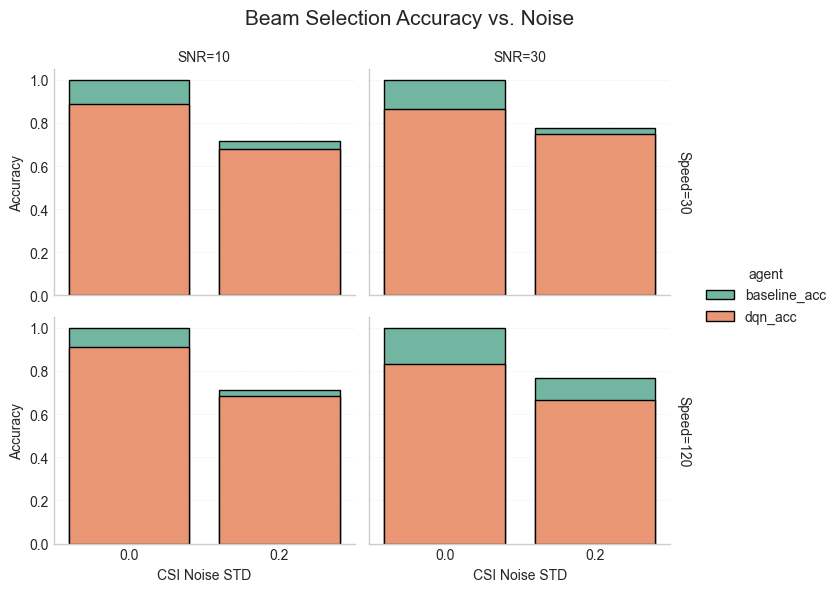

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

summary = pd.read_csv("../results/summary_all_noise_sweep.csv")

def extract_speed_snr(name):
    m = re.search(r'speed(\d+)_snr(\d+)', name)
    if m: return int(m.group(1)), int(m.group(2))
    return None, None

summary['speed'] = summary['dataset'].apply(lambda x: extract_speed_snr(x)[0])
summary['snr'] = summary['dataset'].apply(lambda x: extract_speed_snr(x)[1])

summary = summary[summary['delay_steps'] == 1]
summary = summary[(summary['user']==1) & (summary['stream']==1)]

agent_cols = [col for col in summary.columns if col.endswith("_acc") and not col.startswith("random")]
if "random_acc" in summary.columns:
    agent_cols = ["baseline_acc"] + [col for col in agent_cols if col != "baseline_acc"]

summary_melt = summary.melt(
    id_vars=["speed", "snr", "csi_noise_std"],
    value_vars=agent_cols,
    var_name="agent", value_name="accuracy"
)

# **修正 FacetGrid 調用：hue 只在 FacetGrid 初始化時指定**
g = sns.FacetGrid(
    summary_melt,
    row="speed", col="snr", hue="agent",
    margin_titles=True, sharey=True, height=3, aspect=1.2,
    palette="Set2"  # 顏色更友善
)
g.map_dataframe(sns.barplot, x="csi_noise_std", y="accuracy", dodge=True, edgecolor='k', errorbar=None)
g.set_axis_labels("CSI Noise STD", "Accuracy")
g.add_legend()
g.set_titles(row_template='Speed={row_name}', col_template='SNR={col_name}')
for ax in g.axes.flatten():
    ax.set_ylim(0, 1.05)
    ax.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.35)
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Beam Selection Accuracy vs. Noise", fontsize=15)
plt.show()
